In [30]:
import pandas as pd
from astropy.io import fits
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt

from dateutil.parser import parse
import align_moving

from importlib import reload

from os.path import exists

In [3]:
# read in images table

imgs = pd.read_csv('img_master_spreadsheet.csv')

imgs['timestamp'] = imgs['timestamp'].apply(parse)

def _get_aligned_img_path(fp: str):
    return str(Path('./aligned/').joinpath(Path(fp).name.rstrip('.fits') + '_affineremap.fits'))

imgs['aligned_filepath'] = imgs['filepath'].apply(_get_aligned_img_path)
imgs['ok'] = imgs['aligned_filepath'].apply(exists)

okay = imgs['ok'] == True

#imgs.sort_values('timestamp', inplace=True)

imgs
# PLEASE RUN THE FILTER CELL AFTER THIS (see above)

,Unnamed: 0,filepath,timestamp,ref_img,ok,aligned_filepath
0,0,processed/combined_2022-11-13T03:49:33.0000__B...,2022-11-13 03:49:33,./processed/combined_2022-11-13T02:40:26.0000_...,True,aligned/combined_2022-11-13T03:49:33.0000__Bro...
1,2,processed/combined_2022-11-12T07:15:36.0000__B...,2022-11-12 07:15:36,./processed/combined_2022-11-12T06:59:36.0000_...,False,aligned/combined_2022-11-12T07:15:36.0000__Bro...
2,3,processed/combined_2022-11-11T07:16:31.0000__B...,2022-11-11 07:16:31,./processed/combined_2022-11-11T05:51:00.0000_...,False,aligned/combined_2022-11-11T07:16:31.0000__Bro...
3,4,processed/combined_2022-11-12T06:12:20.0000__B...,2022-11-12 06:12:20,./processed/combined_2022-11-12T06:59:36.0000_...,False,aligned/combined_2022-11-12T06:12:20.0000__Bro...
4,5,processed/combined_2022-11-11T06:14:00.0000__B...,2022-11-11 06:14:00,./processed/combined_2022-11-11T05:51:00.0000_...,True,aligned/combined_2022-11-11T06:14:00.0000__Bro...
...,...,...,...,...,...,...
605,656,processed/combined_2022-11-11T06:47:20.0000__B...,2022-11-11 06:47:20,./processed/combined_2022-11-11T05:51:00.0000_...,False,aligned/combined_2022-11-11T06:47:20.0000__Bro...
606,657,processed/combined_2022-11-13T06:35:57.0000__B...,2022-11-13 06:35:57,./processed/combined_2022-11-13T02:40:26.0000_...,True,aligned/combined_2022-11-13T06:35:57.0000__Bro...
607,658,processed/combined_2022-11-13T05:10:40.0000__B...,2022-11-13 05:10:40,./processed/combined_2022-11-13T02:40:26.0000_...,False,aligned/combined_2022-11-13T05:10:40.0000__Bro...
608,659,processed/combined_2022-11-11T07:44:51.0000__B...,2022-11-11 07:44:51,./processed/combined_2022-11-11T05:51:00.0000_...,False,aligned/combined_2022-11-11T07:44:51.0000__Bro...


In [5]:
# FILTER CELL

night_1 = (imgs['timestamp'] >= parse('2022-11-11T05:51:00')) & (imgs['timestamp'] < parse('2022-11-12T00:00:00'))



night_2_group_1 = (
    (parse('2022-11-12T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-12T05:59:20'))
    )

night_2_group_2 = (
    (parse('2022-11-12T05:59:20') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-13T00:00:00'))
    )


night_3 = (
    (parse('2022-11-13T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-14T00:00:00'))
    )


In [19]:
align_moving = reload(align_moving)

# Photometry

In [27]:
# click on image to print its coordinates and timestamp!
# MAKE SURE TO RUN pip install mplcursors
%matplotlib tk

align_moving.get_coords_of_point(imgs.loc[night_3 & okay, 'aligned_filepath'].iloc[1])

199.85446533985504, 522.2997343565527, '2022-11-13T03:51:33.0000'
599.9541167706755, 1318.1342623826392, '2022-11-13T03:51:33.0000'
1199.0700792713783, 266.3247596559286, '2022-11-13T03:51:33.0000'


In [7]:
# NIGHT 1

%matplotlib tk

FWHM = 13

photometry = align_moving.do_photometry_with_timestamps(
    imgs[okay][night_1]['aligned_filepath'],

    start_object_x=723.7147046501888,
    start_object_y=944.1470203183914,
    start_object_t='2022-11-11T06:14:00.0000',

    end_object_x=676.7723412773491,
    end_object_y=948.8662977890997,
    end_object_t='2022-11-11T06:01:00.0000', 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[] # CHANGE THIS
 
)

photometry

/var/folders/p8/xx7c8vpj7qj510bw5jdsr0800000gq/T/ipykernel_27535/1414686120.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imgs[okay][night_1]['aligned_filepath'],


IndexError: list index out of range

In [26]:
# Night 2 group 1

%matplotlib tk

FWHM = 10

photometry = align_moving.do_photometry_with_timestamps(
    imgs[okay & night_2_group_1]['aligned_filepath'],

    start_object_x=651,
    start_object_y=983,
    start_object_t='2022-11-12T02:49:48',

    end_object_x=1088,
    end_object_y=938,
    end_object_t='2022-11-12T04:51:31', 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False,

    reference_positions=[(1009.8564266803644, 511.4699819071131), (1445.0230224321135, 583.3006409175242)] # CHANGE THIS

)

photometry

0      3838.828946
1      4049.702873
2      3955.284480
3      4360.895480
4      4456.608365
          ...     
114    4663.287861
115    4510.844404
116    4246.611487
117    3578.580818
118    3930.402249
Name: aperture_sum_bkgsub, Length: 119, dtype: float64


/Users/student/A101/Project/align_moving.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data["num"].loc[i] = i


,target_subtracted_counts,star_subtracted_counts,num,timestamp,differential,uncalibrated_star_mag,uncalibrated_target_mag,differential_mag
0,6947.522039,3838.828946,NaN,NaN,3108.693093,-8.960497,-9.604575,-0.644078
1,6929.487724,4049.702873,NaN,NaN,2879.784850,-9.018558,-9.601753,-0.583195
2,4974.947019,3955.284480,NaN,NaN,1019.662539,-8.992944,-9.241971,-0.249027
3,5059.634886,4360.895480,NaN,NaN,698.739406,-9.098939,-9.260298,-0.161359
4,6623.236114,4456.608365,NaN,NaN,2166.627749,-9.122511,-9.552676,-0.430164
...,...,...,...,...,...,...,...,...
114,7366.868942,4663.287861,NaN,NaN,2703.581081,-9.171731,-9.668207,-0.496477
115,6456.070655,4510.844404,NaN,NaN,1945.226251,-9.135645,-9.524921,-0.389276
116,6784.731496,4246.611487,NaN,NaN,2538.120009,-9.070106,-9.578832,-0.508725
117,5287.917723,3578.580818,NaN,NaN,1709.336905,-8.884277,-9.308212,-0.423935


In [35]:
# Night 3

#1211.797141170518, 858.9736043177603, '2022-11-13T06:35:57.0000'

#617.4767807949628, 932.9911452184181, '2022-11-13T03:51:33.0000'

%matplotlib tk

FWHM = 17

photometry = align_moving.do_photometry_with_timestamps(
    imgs[okay&night_3]['aligned_filepath'],

    start_object_x=617.4767807949628,
    start_object_y=932.9911452184181,
    start_object_t='2022-11-13T03:51:33.0000',

    end_object_x=1211.797141170518,
    end_object_y=858.9736043177603,
    end_object_t='2022-11-13T06:35:57.0000', 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False,

    reference_positions=[
        (199.85446533985504, 522.2997343565527), 
        (599.9541167706755, 1318.1342623826392), 
        (1199.0700792713783, 266.3247596559286), 

    ]

)

photometry

/var/folders/p8/xx7c8vpj7qj510bw5jdsr0800000gq/T/ipykernel_27535/2471198074.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imgs[okay][night_3]['aligned_filepath'],


0      228089.469146
1      227450.557212
2      229897.141955
3      229590.926162
4      231923.040991
           ...      
147    231019.430302
148    226892.147820
149    217209.174597
150    229188.614910
151    211123.035641
Name: aperture_sum_bkgsub, Length: 152, dtype: float64


/Users/student/A101/Project/align_moving.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data["num"].loc[i] = i


,target_subtracted_counts,star_subtracted_counts,num,timestamp,differential,uncalibrated_star_mag,uncalibrated_target_mag,differential_mag
0,6848.785480,228089.469146,NaN,NaN,-221240.683666,-13.395263,-9.589034,3.806229
1,7025.966443,227450.557212,NaN,NaN,-220424.590769,-13.392218,-9.616765,3.775452
2,5669.077777,229897.141955,NaN,NaN,-224228.064177,-13.403834,-9.383781,4.020053
3,3718.430358,229590.926162,NaN,NaN,-225872.495804,-13.402387,-8.925899,4.476488
4,6973.340713,231923.040991,NaN,NaN,-224949.700278,-13.413360,-9.608602,3.804758
...,...,...,...,...,...,...,...,...
147,6272.217857,231019.430302,NaN,NaN,-224747.212446,-13.409121,-9.493553,3.915568
148,7477.787508,226892.147820,NaN,NaN,-219414.360312,-13.389549,-9.684433,3.705116
149,3773.473191,217209.174597,NaN,NaN,-213435.701406,-13.342195,-8.941853,4.400342
150,7555.930058,229188.614910,NaN,NaN,-221632.684851,-13.400483,-9.695720,3.704763


In [37]:
photometry['timestamp']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
147   NaN
148   NaN
149   NaN
150   NaN
151   NaN
Name: timestamp, Length: 152, dtype: float64

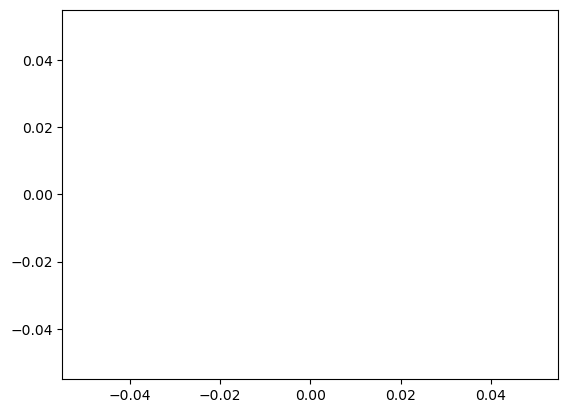

In [36]:
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(photometry['timestamp'], photometry['differential_mag'])